In [1]:
# The notebook was run using Python version 3.10.7
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import f1_score, accuracy_score, precision_score,  recall_score, f1_score, confusion_matrix

import tensorflow as tf
from tensorflow import keras
from keras.metrics import Precision, Recall
import numpy as np

from sklearn.model_selection import GridSearchCV

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

from sklearn.covariance import EllipticEnvelope

from sklearn.ensemble import IsolationForest
from imblearn.under_sampling import RandomUnderSampler

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score

In [2]:
retail_data = pd.read_csv("Retail data.csv", sep=';', header=0)
potential_customers = pd.read_csv("Potential Customers.csv", sep=';', header=0)


retail_data['CUST_INCOME'] = retail_data['CUST_INCOME'].str.replace(',', '').astype(float)
retail_data['CURRENT_BALANCE_EUR'] = retail_data['CURRENT_BALANCE_EUR'].str.replace(',', '').astype(float)


print(retail_data.isnull().sum())

Cocunut                       0
Mortgage_YN                   0
AGE_AT_ORIGINATION        23677
AGE                           0
YEARS_WITH_BANK               0
MARTIAL_STATUS                0
EDUCATION                     0
EMPLOYMENT                    0
GENDER                        0
CUST_INCOME                   0
CURRENT_ADDRESS_DATE          0
CURRENT_JOB_DATE              0
CURRENT_WITH_BANK_DATE        0
CURRENT_BALANCE_EUR           0
dtype: int64


In [170]:
retail_data.head()

,Cocunut,Mortgage_YN,AGE_AT_ORIGINATION,AGE,YEARS_WITH_BANK,MARTIAL_STATUS,EDUCATION,EMPLOYMENT,GENDER,CUST_INCOME,CURRENT_ADDRESS_DATE,CURRENT_JOB_DATE,CURRENT_WITH_BANK_DATE,CURRENT_BALANCE_EUR
0,1,Y,50.0,52,13,M,HGH,PVE,M,9.095013e+09,1979-04-18,2010-01-01,2004-03-16,7.648351e+09
1,9,Y,48.0,49,11,M,HGH,SFE,M,2.884615e+09,1999-12-16,2004-01-20,2005-11-07,3.018990e+09
2,11,Y,53.0,55,14,M,BCR,STE,M,1.280529e+09,2005-06-28,1990-09-01,2003-06-25,5.055317e+09
3,12,Y,64.0,66,10,M,BCR,OTH,F,6.209598e+09,2000-12-22,9999-10-01,2006-12-21,1.590728e+09
4,18,Y,46.0,47,9,S,MAS,PVE,F,2.239854e+09,2009-08-01,2013-12-24,2007-08-07,2.791619e+09


In [171]:
for column in retail_data.columns:
    print("Column Name:", column)
    print("Info on the data: ", retail_data[column].describe())
    print("---------------------")

Column Name: Cocunut
Info on the data:  count    23983.000000
mean     39969.697786
std      22996.273034
min          1.000000
25%      20076.000000
50%      40066.000000
75%      59778.000000
max      79998.000000
Name: Cocunut, dtype: float64
---------------------
Column Name: Mortgage_YN
Info on the data:  count     23983
unique        2
top           N
freq      23677
Name: Mortgage_YN, dtype: object
---------------------
Column Name: AGE_AT_ORIGINATION
Info on the data:  count    306.000000
mean      41.333333
std        8.970992
min       22.000000
25%       35.000000
50%       40.000000
75%       47.750000
max       64.000000
Name: AGE_AT_ORIGINATION, dtype: float64
---------------------
Column Name: AGE
Info on the data:  count    23983.000000
mean        49.004378
std         12.976205
min         20.000000
25%         39.000000
50%         49.000000
75%         60.000000
max         92.000000
Name: AGE, dtype: float64
---------------------
Column Name: YEARS_WITH_BANK
Info o

Checking for number of this weird date '9999-10-01', because it will certainly cause conflicts when managing datetime values 

In [172]:
print((retail_data=='9999-10-01').sum().sum())

5965


Removing said weird date from the dataset, setting a future date as placeholder

In [3]:
retail_data['CURRENT_ADDRESS_DATE']  = retail_data['CURRENT_ADDRESS_DATE'].replace('9999-10-01', '2030-01-01')
retail_data['CURRENT_JOB_DATE']  = retail_data['CURRENT_JOB_DATE'].replace('9999-10-01', '2030-01-01')
retail_data['CURRENT_WITH_BANK_DATE']  = retail_data['CURRENT_WITH_BANK_DATE'].replace('9999-10-01', '2030-01-01')


retail_data['CURRENT_ADDRESS_DATE'] = pd.to_datetime(retail_data['CURRENT_ADDRESS_DATE'])
retail_data['CURRENT_JOB_DATE'] = pd.to_datetime(retail_data['CURRENT_JOB_DATE'])
retail_data['CURRENT_WITH_BANK_DATE'] = pd.to_datetime(retail_data['CURRENT_WITH_BANK_DATE'])


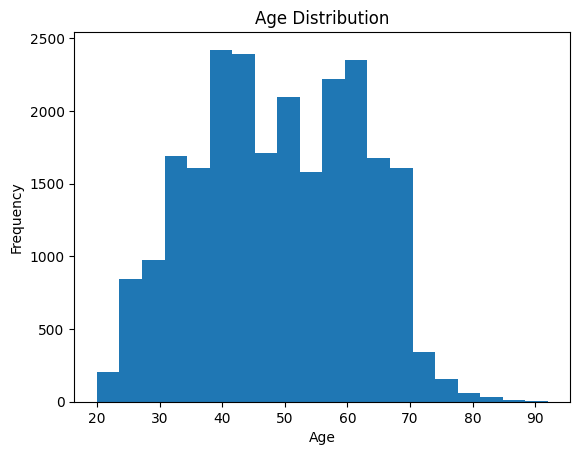

In [174]:
plt.hist(retail_data['AGE'], bins=20)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.show()

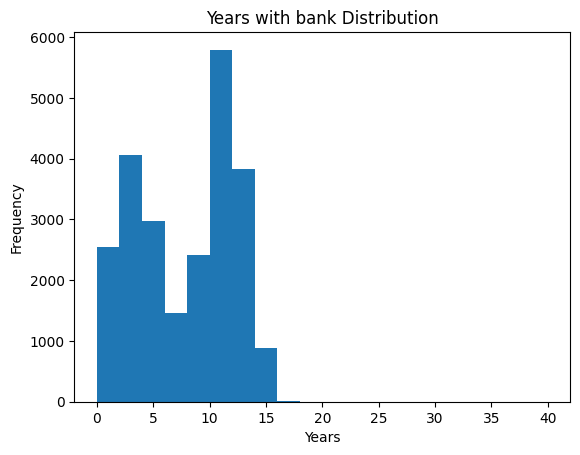

In [35]:
plt.hist(retail_data['YEARS_WITH_BANK'], bins=20)
plt.xlabel('Years')
plt.ylabel('Frequency')
plt.title('Years with bank Distribution')
plt.show()

Long vs short term customers, earnings comparison

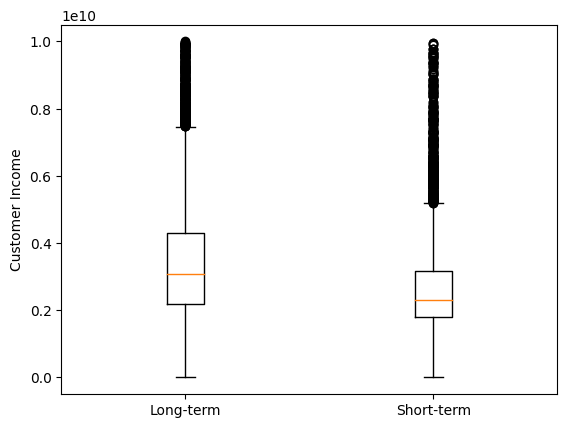

In [7]:
long_term = retail_data[retail_data['YEARS_WITH_BANK'] > 10]
short_term = retail_data[retail_data['YEARS_WITH_BANK'] < 5]

plt.boxplot([long_term['CUST_INCOME'], short_term['CUST_INCOME']])
plt.xticks([1, 2], ['Long-term', 'Short-term'])
plt.ylabel('Customer Income')
plt.show()

A lot of outliers 

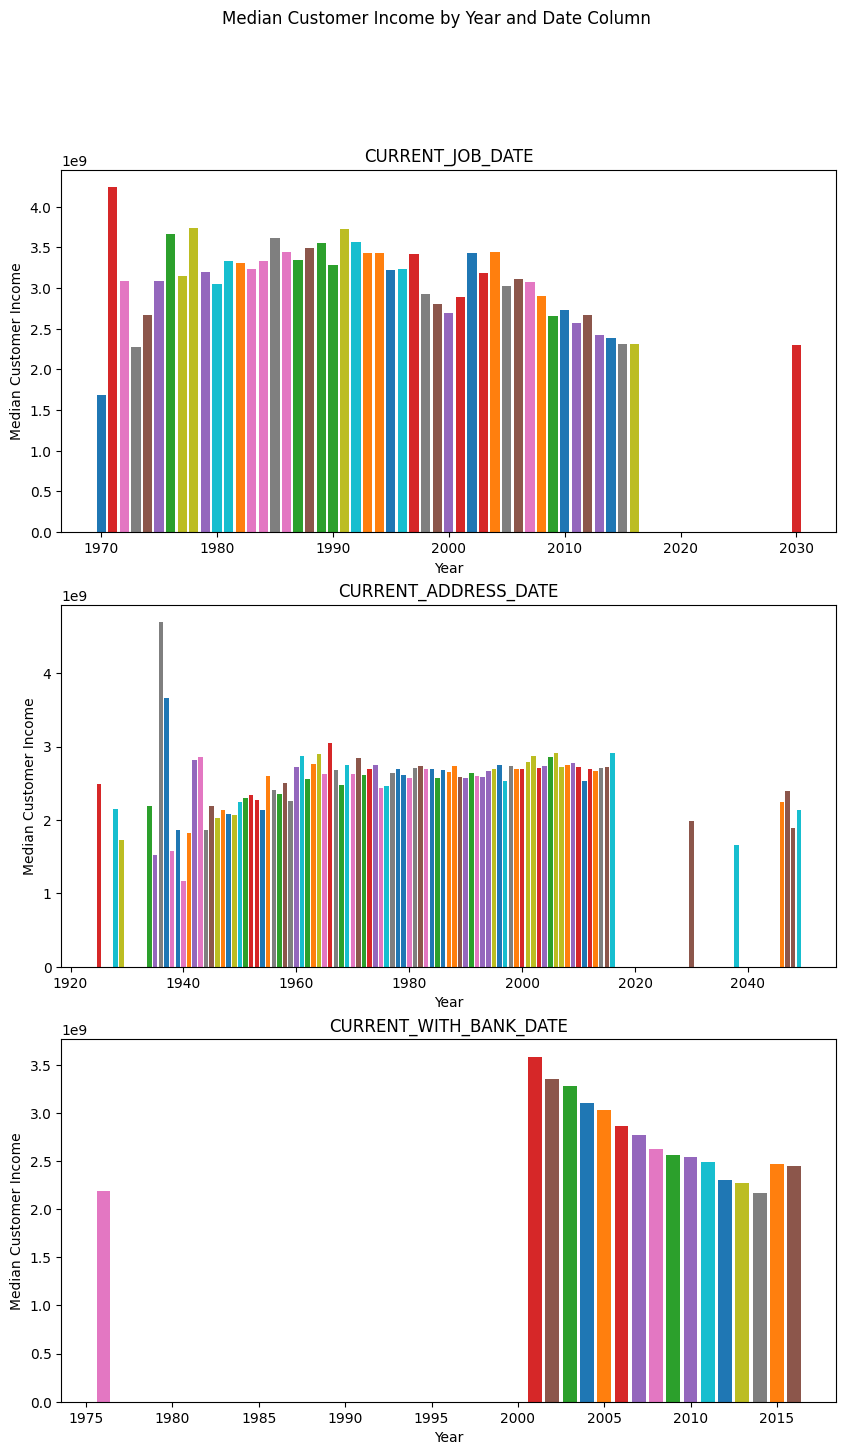

In [175]:
years_job = retail_data['CURRENT_JOB_DATE'].dt.year.unique()
years_address = retail_data['CURRENT_ADDRESS_DATE'].dt.year.unique()
years_bank = retail_data['CURRENT_WITH_BANK_DATE'].dt.year.unique()

fig, axs = plt.subplots(3, 1, figsize=(10, 16))
fig.suptitle('Median Customer Income by Year and Date Column')

for i, year in enumerate(years_job):
    df = retail_data[retail_data['CURRENT_JOB_DATE'].dt.year == year]
    median_balance = df['CUST_INCOME'].median()
    axs[0].bar(year, median_balance)
    
axs[0].set_title('CURRENT_JOB_DATE')
axs[0].set_xlabel('Year')
axs[0].set_ylabel('Median Customer Income')

for i, year in enumerate(years_address):
    df = retail_data[retail_data['CURRENT_ADDRESS_DATE'].dt.year == year]
    median_balance = df['CUST_INCOME'].median()
    axs[1].bar(year, median_balance)
    
axs[1].set_title('CURRENT_ADDRESS_DATE')
axs[1].set_xlabel('Year')
axs[1].set_ylabel('Median Customer Income')

for i, year in enumerate(years_bank):
    df = retail_data[retail_data['CURRENT_WITH_BANK_DATE'].dt.year == year]
    median_balance = df['CUST_INCOME'].median()
    axs[2].bar(year, median_balance)
    
axs[2].set_title('CURRENT_WITH_BANK_DATE')
axs[2].set_xlabel('Year')
axs[2].set_ylabel('Median Customer Income')

plt.show()

People who were with the bank longer, on average earn more, accross the board, other information is inconclusive.

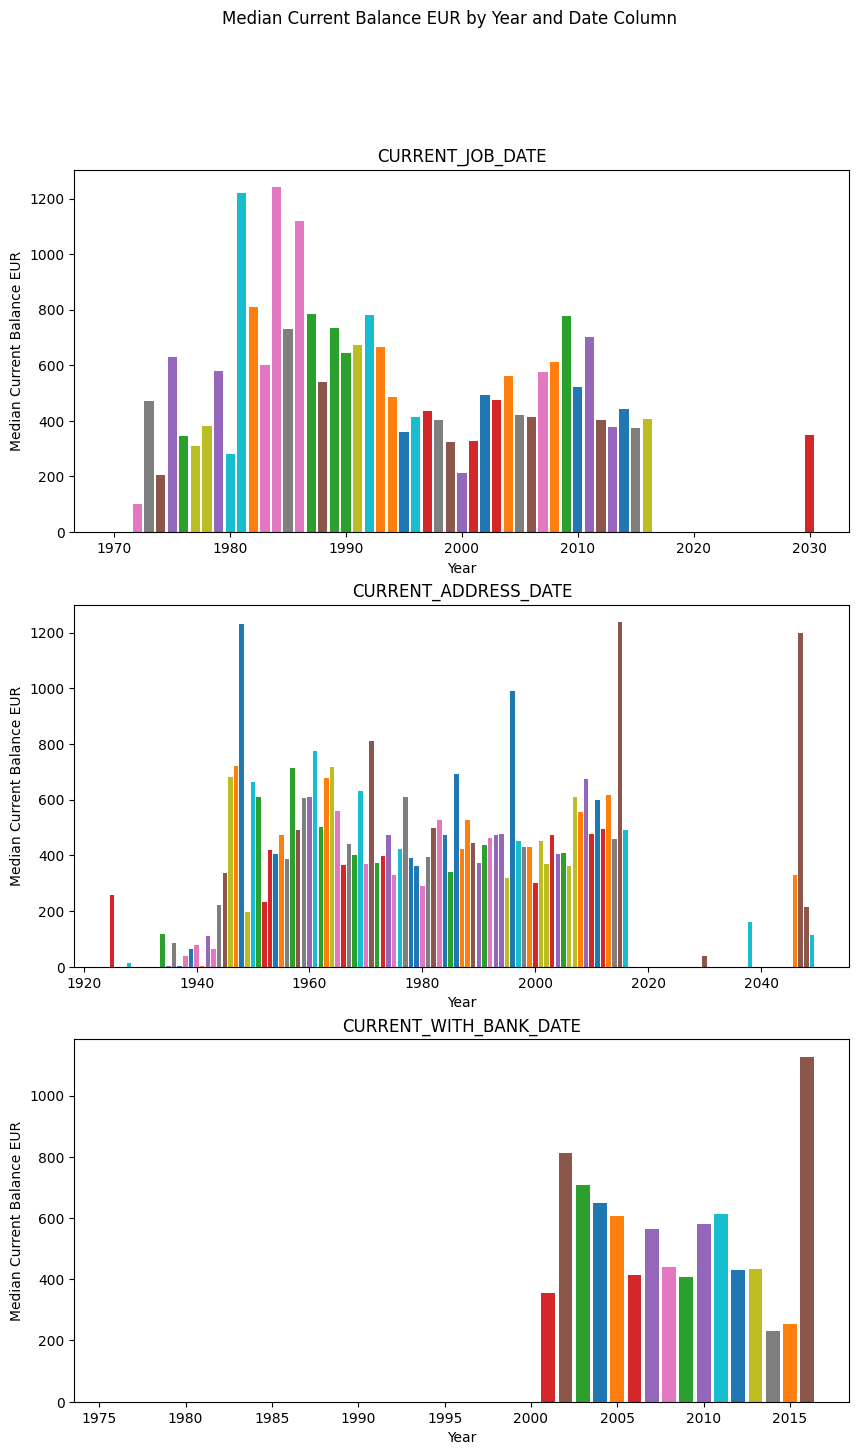

In [108]:
years_job = retail_data['CURRENT_JOB_DATE'].dt.year.unique()
years_address = retail_data['CURRENT_ADDRESS_DATE'].dt.year.unique()
years_bank = retail_data['CURRENT_WITH_BANK_DATE'].dt.year.unique()


fig, axs = plt.subplots(3, 1, figsize=(10, 16))
fig.suptitle('Median Current Balance EUR by Year and Date Column')

for i, year in enumerate(years_job):
    df = retail_data[retail_data['CURRENT_JOB_DATE'].dt.year == year]
    median_balance = df['CURRENT_BALANCE_EUR'].median()
    axs[0].bar(year, median_balance)
    
axs[0].set_title('CURRENT_JOB_DATE')
axs[0].set_xlabel('Year')
axs[0].set_ylabel('Median Current Balance EUR')

for i, year in enumerate(years_address):
    df = retail_data[retail_data['CURRENT_ADDRESS_DATE'].dt.year == year]
    median_balance = df['CURRENT_BALANCE_EUR'].median()
    axs[1].bar(year, median_balance)
    
axs[1].set_title('CURRENT_ADDRESS_DATE')
axs[1].set_xlabel('Year')
axs[1].set_ylabel('Median Current Balance EUR')

for i, year in enumerate(years_bank):
    df = retail_data[retail_data['CURRENT_WITH_BANK_DATE'].dt.year == year]
    median_balance = df['CURRENT_BALANCE_EUR'].median()
    axs[2].bar(year, median_balance)
    
axs[2].set_title('CURRENT_WITH_BANK_DATE')
axs[2].set_xlabel('Year')
axs[2].set_ylabel('Median Current Balance EUR')

plt.show()

There are some people who are living in the future, literally, as they have their residence date set to somewhere beyond the year 2040.

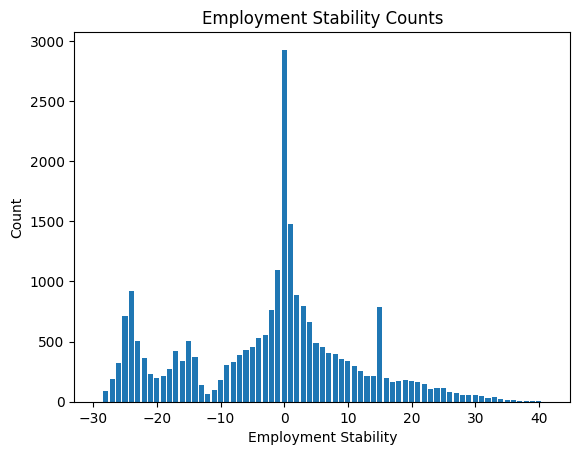

In [176]:
retail_data['EMPLOYMENT_STABILITY'] = round((pd.to_datetime(retail_data['CURRENT_WITH_BANK_DATE']) - pd.to_datetime(retail_data['CURRENT_JOB_DATE'])).dt.days / 365)

stability_counts = retail_data['EMPLOYMENT_STABILITY'].value_counts()
plt.bar(stability_counts.index, stability_counts.values)
plt.title('Employment Stability Counts')
plt.xlabel('Employment Stability')
plt.ylabel('Count')
plt.show()

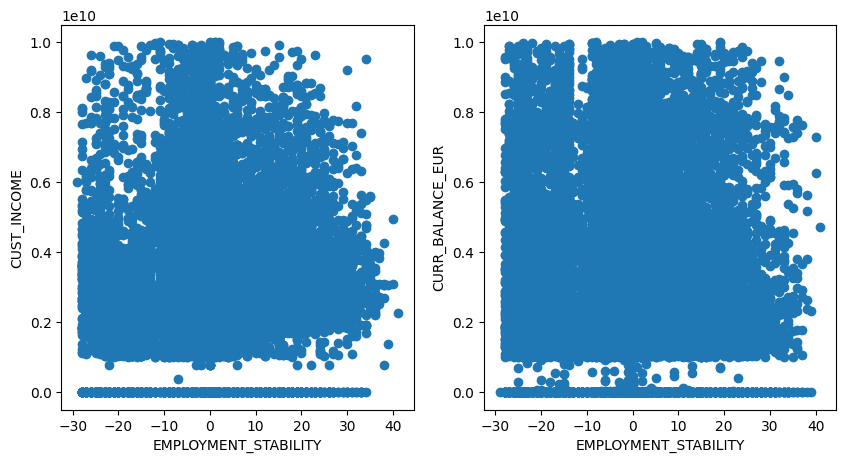

In [270]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10,5))
ax1.scatter(retail_data['EMPLOYMENT_STABILITY'], retail_data['CUST_INCOME'])
ax1.set_xlabel('EMPLOYMENT_STABILITY')
ax1.set_ylabel('CUST_INCOME')

ax2.scatter(retail_data['EMPLOYMENT_STABILITY'], retail_data['CURRENT_BALANCE_EUR'])
ax2.set_xlabel('EMPLOYMENT_STABILITY')
ax2.set_ylabel('CURR_BALANCE_EUR')

plt.show()

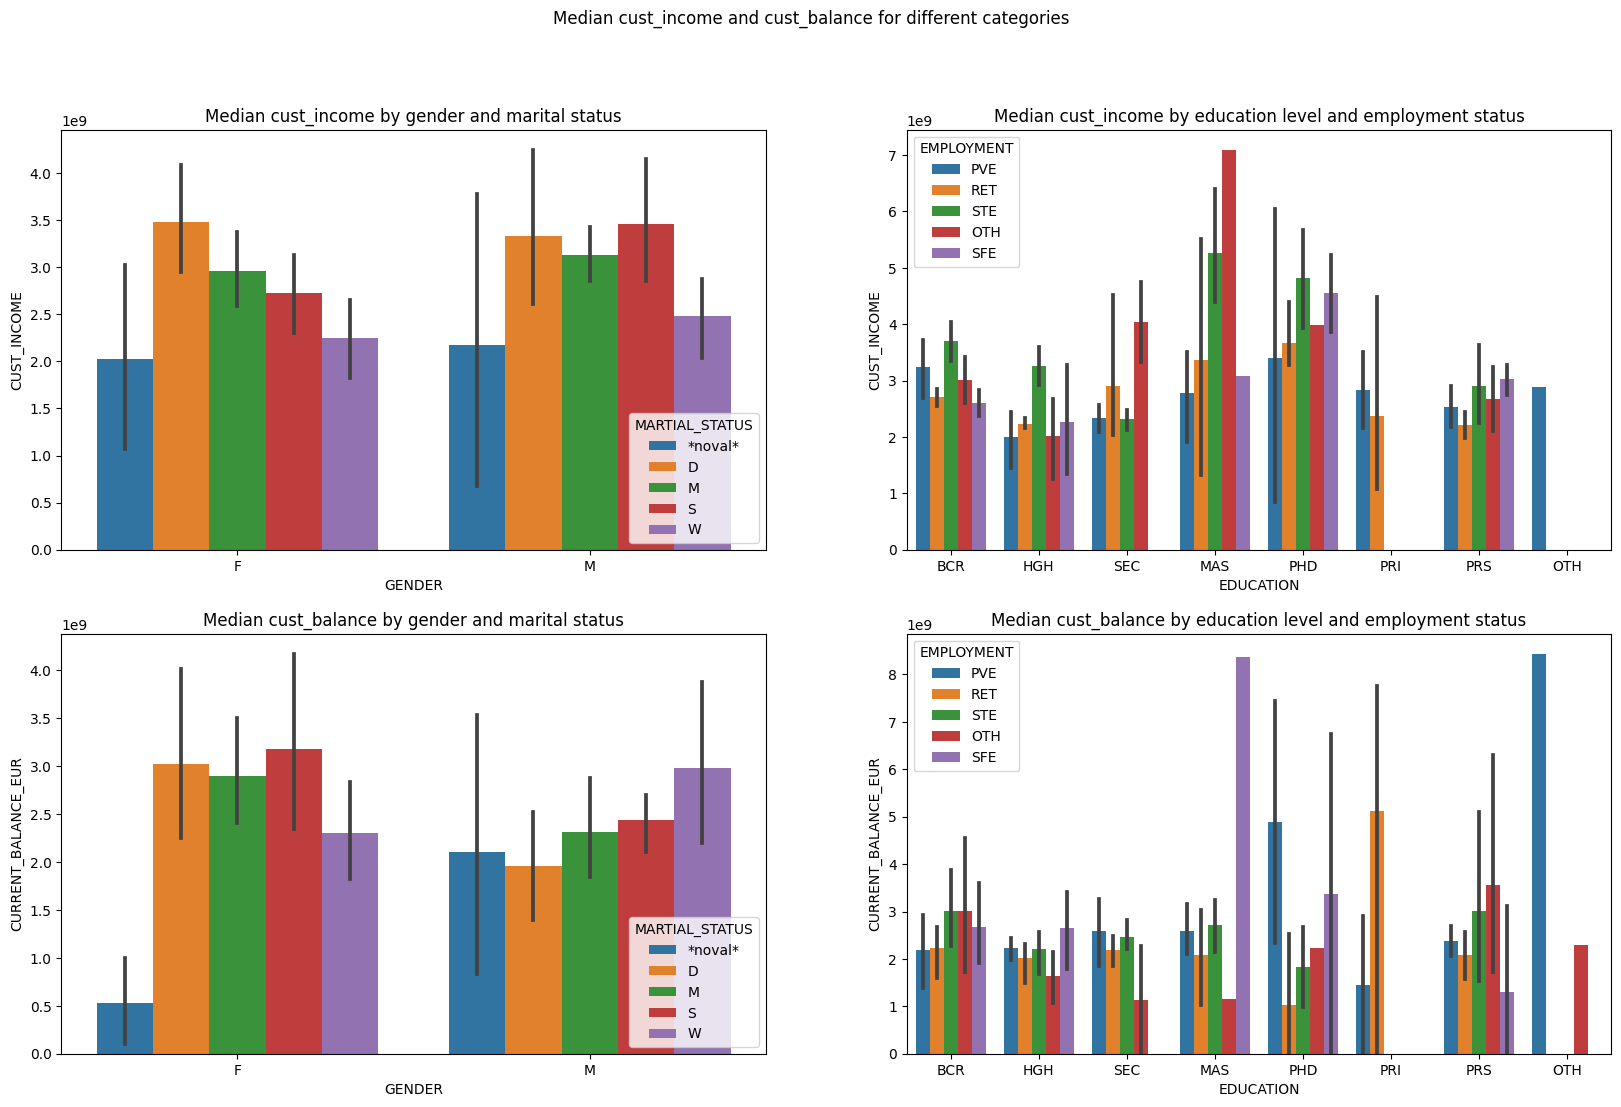

In [177]:
grouped_data = retail_data.groupby(['GENDER', 'MARTIAL_STATUS', 'EDUCATION', 'EMPLOYMENT']).median().reset_index()

fig, axes = plt.subplots(2, 2, figsize=(20, 12))

sns.barplot(x='GENDER', y='CUST_INCOME', hue='MARTIAL_STATUS', data=grouped_data, ax=axes[0, 0])
sns.barplot(x='EDUCATION', y='CUST_INCOME', hue='EMPLOYMENT', data=grouped_data, ax=axes[0, 1])

sns.barplot(x='GENDER', y='CURRENT_BALANCE_EUR', hue='MARTIAL_STATUS', data=grouped_data, ax=axes[1, 0])
sns.barplot(x='EDUCATION', y='CURRENT_BALANCE_EUR', hue='EMPLOYMENT', data=grouped_data, ax=axes[1, 1])

axes[0, 0].set_title('Median cust_income by gender and marital status')
axes[0, 1].set_title('Median cust_income by education level and employment status')
axes[1, 0].set_title('Median cust_balance by gender and marital status')
axes[1, 1].set_title('Median cust_balance by education level and employment status')

fig.suptitle('Median cust_income and cust_balance for different categories')
fig.savefig('my_plot.jpeg')
plt.show()

In [299]:
mortgage_ages = retail_data.groupby(['Mortgage_YN', 'EDUCATION'])['AGE'].mean()
mortgage_ages = mortgage_ages.reset_index()
mortgage_ages = mortgage_ages.pivot(index='EDUCATION', columns='Mortgage_YN', values='AGE')
print(mortgage_ages)

Mortgage_YN          N          Y
EDUCATION                        
BCR          49.105744  43.117647
HGH          49.019826  42.757576
MAS          44.522989  40.000000
OTH          54.500000        NaN
PHD          51.943925  47.500000
PRI          54.000000        NaN
PRS          47.694754  37.250000
SEC          54.417476  41.500000


Distributions of income and balance

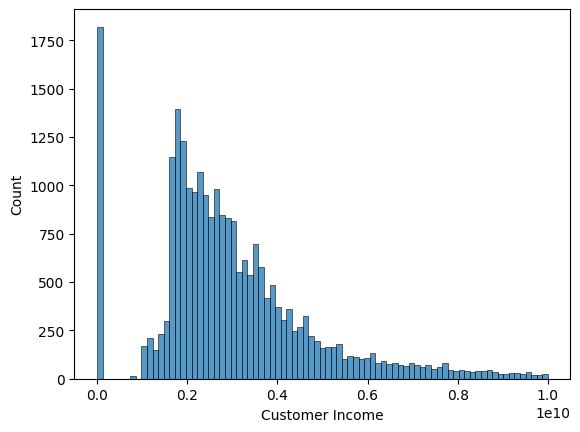

In [179]:
sns.histplot(retail_data['CUST_INCOME'], kde=False)
plt.xlabel('Customer Income')
plt.ylabel('Count')
plt.show()

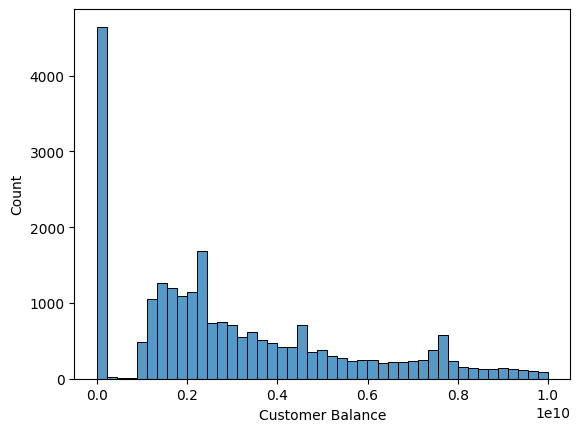

In [63]:
sns.histplot(retail_data['CURRENT_BALANCE_EUR'], kde=False)
plt.xlabel('Customer Balance')
plt.ylabel('Count')
plt.show()

In this case, there are many values which are 0, in the balance, and very little in case of earnings

In [271]:
count = (retail_data['CUST_INCOME'] < 10000).sum()
print("Number of values under 10000:", count)

Number of values under 10000: 798


In [272]:
count = (retail_data['CURRENT_BALANCE_EUR'] ==0).sum()
print("Number of values equal to 0:", count)

Number of values equal to 0: 2911


In [183]:
print(retail_data.shape)
print(potential_customers.shape)
print(retail_data.describe())
print(retail_data.info())

(23983, 15)
(2747, 12)
            Cocunut  AGE_AT_ORIGINATION           AGE  YEARS_WITH_BANK  \
count  23983.000000          306.000000  23983.000000     23983.000000   
mean   39969.697786           41.333333     49.004378         7.370804   
std    22996.273034            8.970992     12.976205         4.320568   
min        1.000000           22.000000     20.000000         0.000000   
25%    20076.000000           35.000000     39.000000         3.000000   
50%    40066.000000           40.000000     49.000000         9.000000   
75%    59778.000000           47.750000     60.000000        11.000000   
max    79998.000000           64.000000     92.000000        40.000000   

        CUST_INCOME  CURRENT_BALANCE_EUR  EMPLOYMENT_STABILITY  
count  2.398300e+04         2.398300e+04          23983.000000  
mean   2.988049e+09         3.012554e+09             -1.975274  
std    1.788579e+09         2.527552e+09             13.303217  
min    0.000000e+00         0.000000e+00          

Differences in median income and current balance in different categories

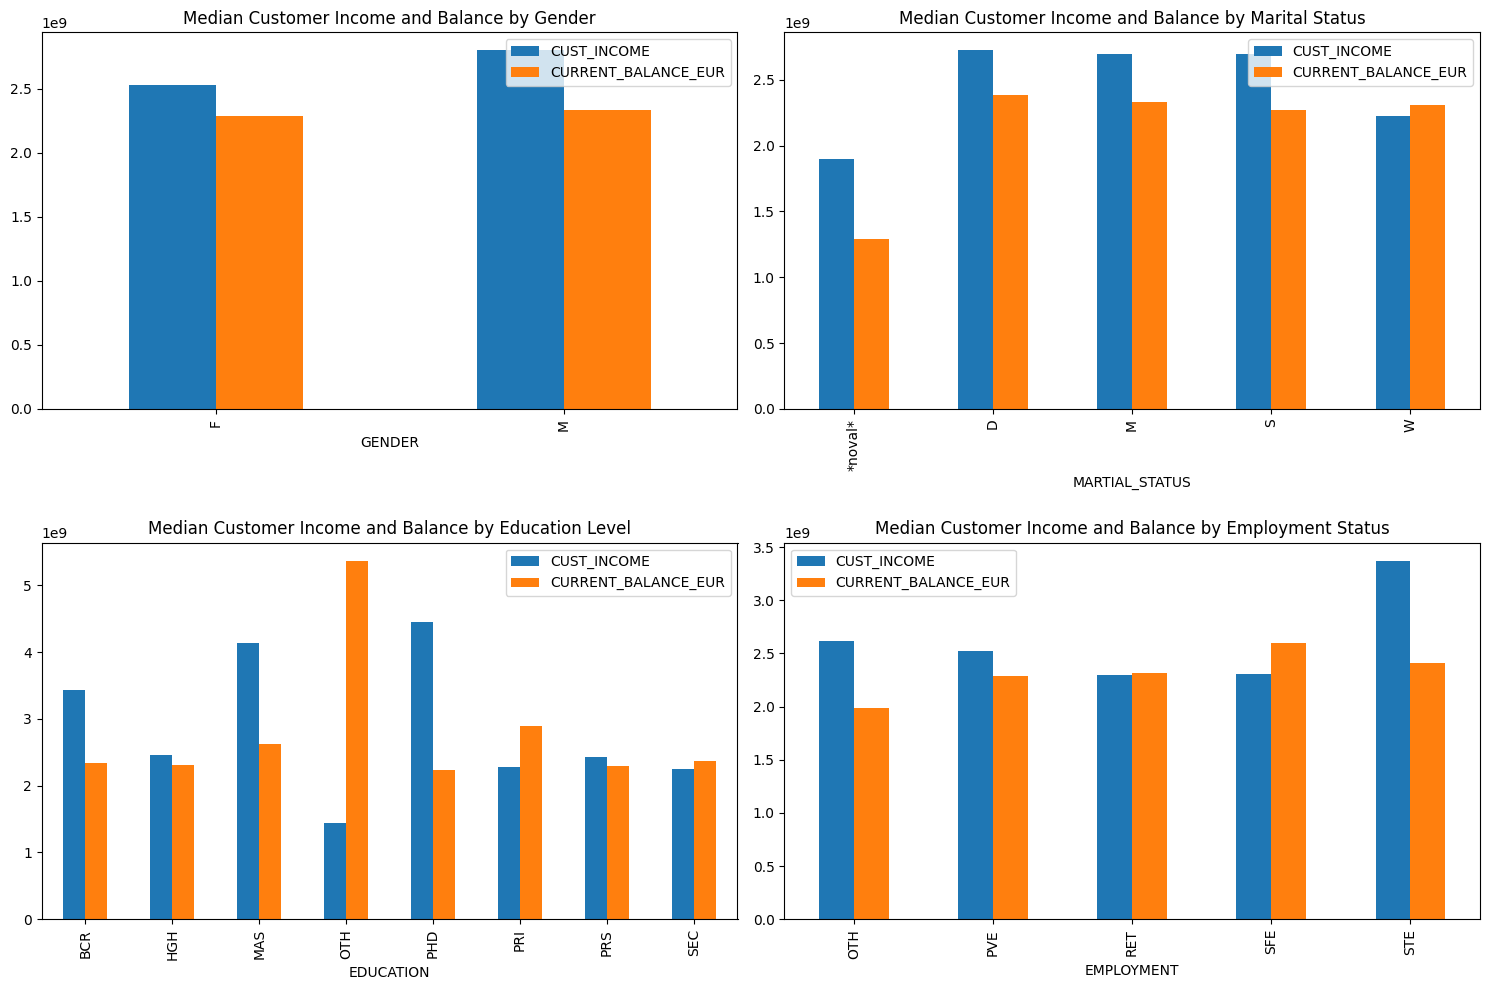

In [184]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

gender_data = retail_data.groupby('GENDER').median()[['CUST_INCOME', 'CURRENT_BALANCE_EUR']]
gender_data.plot(kind='bar', ax=axes[0, 0])
axes[0, 0].set_title('Median Customer Income and Balance by Gender')


marital_data = retail_data.groupby('MARTIAL_STATUS').median()[['CUST_INCOME', 'CURRENT_BALANCE_EUR']]
marital_data.plot(kind='bar', ax=axes[0, 1])
axes[0, 1].set_title('Median Customer Income and Balance by Marital Status')


education_data = retail_data.groupby('EDUCATION').median()[['CUST_INCOME', 'CURRENT_BALANCE_EUR']]
education_data.plot(kind='bar', ax=axes[1, 0])
axes[1, 0].set_title('Median Customer Income and Balance by Education Level')
plt.xticks(rotation=45)


employment_data = retail_data.groupby('EMPLOYMENT').median()[['CUST_INCOME', 'CURRENT_BALANCE_EUR']]
employment_data.plot(kind='bar', ax=axes[1, 1])
axes[1, 1].set_title('Median Customer Income and Balance by Employment Status')

plt.tight_layout()
fig.savefig('Median customer income by different categories.jpeg')
plt.show()

Distribution of median customer income and current balance by mortgage status

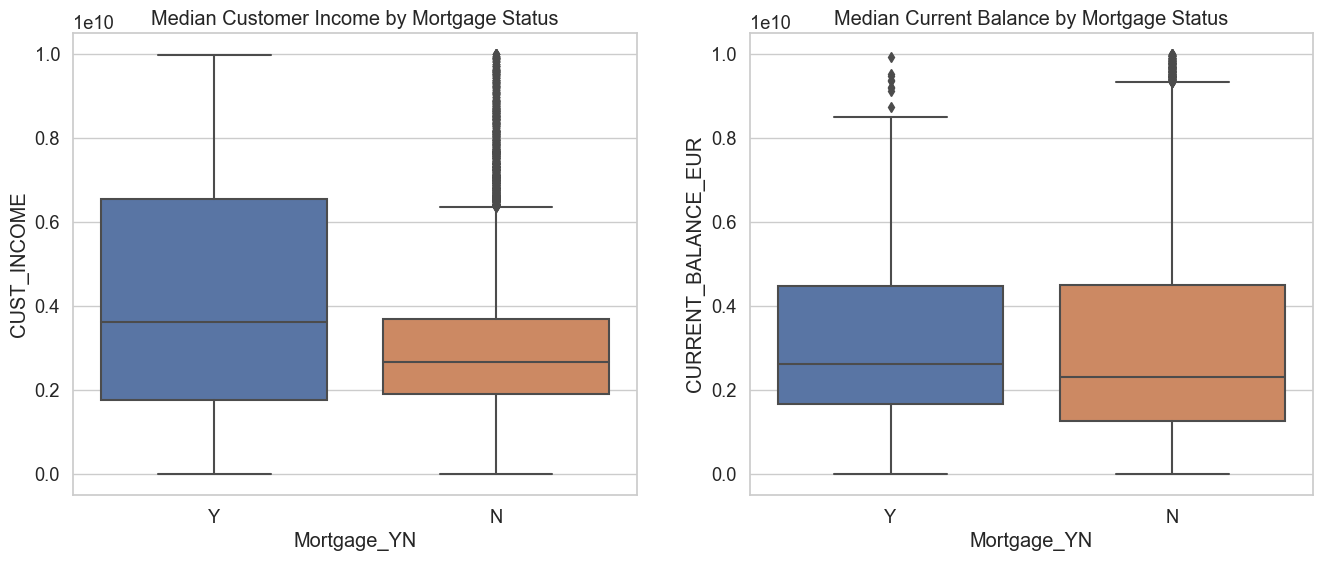

In [51]:
sns.set(style="whitegrid", font_scale=1.2)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))

sns.boxplot(x="Mortgage_YN", y="CUST_INCOME", data=retail_data, ax=ax[0])
ax[0].set_title("Median Customer Income by Mortgage Status")

sns.boxplot(x="Mortgage_YN", y="CURRENT_BALANCE_EUR", data=retail_data, ax=ax[1])
ax[1].set_title("Median Current Balance by Mortgage Status")

plt.show()

# Adjusting for the ML models

In [4]:
retail_data['EMPLOYMENT_STABILITY'] = round((pd.to_datetime(retail_data['CURRENT_WITH_BANK_DATE']) - pd.to_datetime(retail_data['CURRENT_JOB_DATE'])).dt.days / 365)

retail_data.drop(['Cocunut'], axis=1, inplace=True)
potential_customers.drop(['Cocunut'], axis=1, inplace=True)
retail_data = pd.get_dummies(retail_data, columns=['GENDER', 'MARTIAL_STATUS', 'EDUCATION', 'EMPLOYMENT'])
potential_customers = pd.get_dummies(potential_customers, columns=['GENDER', 'MARTIAL_STATUS', 'EDUCATION', 'EMPLOYMENT'])
retail_data['Mortgage_YN'] = retail_data['Mortgage_YN'].replace({'Y': 1, 'N': 0})

We have to drop age at origination, since it is a dead giveaway of who has a mortgage currently

In [5]:
X = retail_data.drop(columns=['Mortgage_YN', 'CURRENT_ADDRESS_DATE', 'CURRENT_JOB_DATE', 'CURRENT_WITH_BANK_DATE', 'AGE_AT_ORIGINATION'], axis=1)
y = retail_data['Mortgage_YN']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=47)

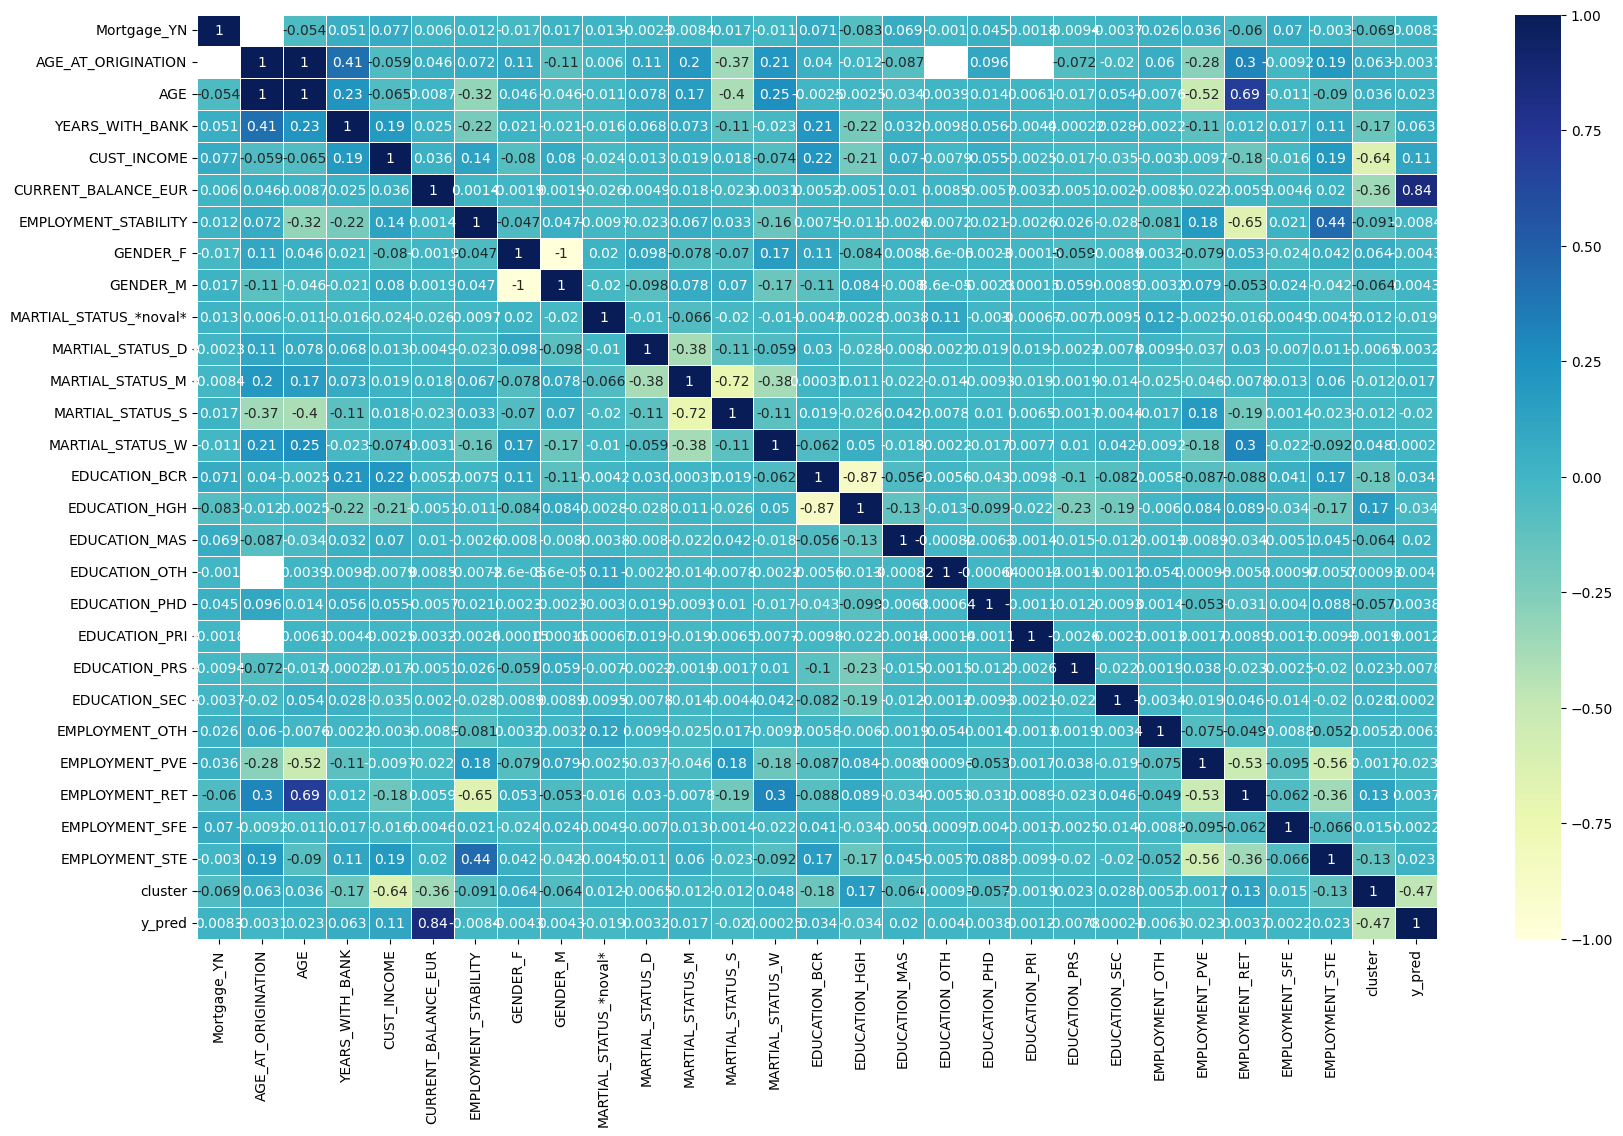

In [273]:
corr = retail_data.corr()

fix, ax = plt.subplots(figsize=(20,12))
sns.heatmap(corr, cmap="YlGnBu", annot=True, linewidths=0.5)

plt.show()

An almost nonexistent correlation of Mortgage_YN with every other column indicates we have a very difficult job ahead of us.

In [8]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

gb = GradientBoostingClassifier(random_state=47)
gb.fit(X_train, y_train)
gb_pred = gb.predict(X_test)
gb_f1 = f1_score(y_test, gb_pred)
print("Gradient Boosting accuracy:", gb_f1)

svm = SVC(random_state=47)
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)
svm_f1 = f1_score(y_test, svm_pred)
print("SVM accuracy:", svm_f1)

Gradient Boosting accuracy: 0.03225806451612903
SVM accuracy: 0.0


Kmeans and PCA

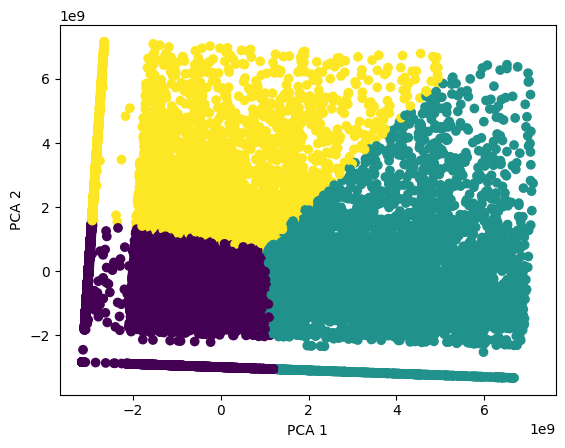

In [283]:
kmeans = KMeans(random_state = 42, n_clusters=3)
kmeans.fit(X)

labels = kmeans.labels_
retail_data['cluster'] = labels

pca = PCA(random_state = 42, n_components=2)
pca.fit(X)

X_pca = pca.transform(X)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

Makes no sense

In [37]:
pca = PCA(random_state = 42, n_components=2)
X_pca = pca.fit_transform(X)


kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_pca)
labels = kmeans.predict(X_pca)

X['Cluster'] = labels

Still, it might help

Logistic regression

In [36]:
model = LogisticRegression(max_iter = 170, random_state=47)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      4740
           1       0.00      0.00      0.00        57

    accuracy                           0.99      4797
   macro avg       0.49      0.50      0.50      4797
weighted avg       0.98      0.99      0.98      4797

[[4740    0]
 [  57    0]]


Doesn't work at all, tried hyperparameter optimization, doesn't work

In [ ]:
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': [0.1, 1, 10, 100],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}

logreg = LogisticRegression(random_state=47)
grid_search = GridSearchCV(logreg, param_grid, scoring='f1')

grid_search.fit(X_train, y_train)

print("Best parameters: ", grid_search.best_params_)
print("Best F1 score: ", grid_search.best_score_)

Decision Tree Classifier

In [64]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth = 17, min_samples_split = 1, random_state=47)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[4676   64]
 [  48    9]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4740
           1       0.12      0.16      0.14        57

    accuracy                           0.98      4797
   macro avg       0.56      0.57      0.56      4797
weighted avg       0.98      0.98      0.98      4797



In [48]:
from sklearn.metrics import make_scorer
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': list(range(1,11)),
    'min_samples_split': list(range(1,30)),
    'min_samples_leaf': list(range(1,15))
}

scorer = make_scorer(f1_score)

dt = DecisionTreeClassifier(random_state=47)
grid = GridSearchCV(dt, param_grid, scoring=scorer, cv=5)

grid.fit(X, y)

print("Best parameters: ", grid.best_params_)
print("Best F1 score: ", grid.best_score_)

Best parameters:  {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 3, 'min_samples_split': 16}
Best F1 score:  0.09011775690378152


Isolation Forest

This model is quite good at discerning which candidates are not fit to be Mortgage loaners, however, because there is only a small number of those that are adequate, it is not especially good at identifying those instances.

In [40]:
iTree = IsolationForest(max_samples = 280, n_estimators = 2, random_state = 420, contamination=0.012)
iTree.fit(X_train)

y_pred = iTree.predict(X_test)
y_pred = (y_pred == -1).astype(int)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[4707   33]
 [  48    9]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4740
           1       0.21      0.16      0.18        57

    accuracy                           0.98      4797
   macro avg       0.60      0.58      0.59      4797
weighted avg       0.98      0.98      0.98      4797



These are some of the additional results I've got at some point, but couldn't remember how to replicate them. The isolation forest algorithm is pretty neat

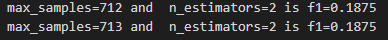


How I did my hyperparameter optimization

In [ ]:
import warnings
warnings.filterwarnings('ignore')
for j in range(1,20):
    for i in range(1,900):
        iTree = IsolationForest(max_samples =i, n_estimators = j, random_state = 420, contamination=0.012, n_jobs=-1)
        iTree.fit(X_train)

        y_pred = iTree.predict(X_test)
        y_pred = (y_pred == -1).astype(int)
        print("max_samples={} and  n_estimators={} is f1={}".format(i, j,
                                                                    f1_score(y_test, y_pred)
                                                                    ))

In [289]:
features = ['CURRENT_BALANCE_EUR', 'CUST_INCOME']

cluster_data = retail_data[features]

scaler = StandardScaler()
cluster_data = scaler.fit_transform(cluster_data)

n_clusters = 2
kmeans = KMeans(n_clusters=n_clusters, random_state=42)

kmeans.fit(cluster_data)
labels = kmeans.predict(cluster_data)

silhouette_coefficient = silhouette_score(cluster_data, labels)

print("Silhouette Coefficient: {:.2f}".format(silhouette_coefficient))


Silhouette Coefficient: 0.41


In [291]:
model = Ridge(alpha=0.1)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

R-squared: 0.027282960369421017


An R-squared value of ~ 0.02 indicates that the linear regression model accounts for approximately 2.36% of the variance in the dependent variable. This means that there may be other factors that are influencing the outcome variable that are not captured by the independent variables included in the model.

# Potential customers dataset
We cannot use the decision tree classifier, because the dataset is unlabeled, we'll try Isolation Forest for the final output csv.

In [67]:
potential_customers = pd.read_csv('Potential Customers.csv', sep=';', header=0)

potential_customers['CUST_INCOME'] = potential_customers['CUST_INCOME'].str.replace(',', '').astype(float)
potential_customers['CURRENT_BALANCE_EUR'] = potential_customers['CURRENT_BALANCE_EUR'].str.replace(',', '').astype(float)

potential_customers['CURRENT_ADDRESS_DATE']  = potential_customers['CURRENT_ADDRESS_DATE'].replace('9999-10-01', '2030-01-01')
potential_customers['CURRENT_JOB_DATE']  = potential_customers['CURRENT_JOB_DATE'].replace('9999-10-01', '2030-01-01')
potential_customers['CURRENT_WITH_BANK_DATE']  = potential_customers['CURRENT_WITH_BANK_DATE'].replace('9999-10-01', '2030-01-01')

potential_customers['CURRENT_ADDRESS_DATE'] = pd.to_datetime(potential_customers['CURRENT_ADDRESS_DATE'])
potential_customers['CURRENT_JOB_DATE'] = pd.to_datetime(potential_customers['CURRENT_JOB_DATE'])
potential_customers['CURRENT_WITH_BANK_DATE'] = pd.to_datetime(potential_customers['CURRENT_WITH_BANK_DATE'])

In [68]:
potential_customers['EMPLOYMENT_STABILITY'] = round((pd.to_datetime(potential_customers['CURRENT_WITH_BANK_DATE']) - pd.to_datetime(potential_customers['CURRENT_JOB_DATE'])).dt.days / 365)
potential_customers = pd.get_dummies(potential_customers, columns=['GENDER', 'MARTIAL_STATUS', 'EDUCATION', 'EMPLOYMENT'])

X = potential_customers.drop(columns=['Cocunut','CURRENT_ADDRESS_DATE', 'CURRENT_JOB_DATE', 'CURRENT_WITH_BANK_DATE'], axis=1)

In [69]:
iTree = IsolationForest(random_state = 420, contamination=0.012)
iTree.fit(X_test)

y_pred2 = iTree.predict(X.drop(columns=['EMPLOYMENT_TEA'], axis=1))
y_pred2 = (y_pred2 == -1).astype(int)

potential_customers['y_pred'] = y_pred2

In [81]:
df.to_csv('predictions.csv')

In [70]:
df = pd.DataFrame(potential_customers[potential_customers['y_pred'] == 1]) 
df.head(40)

,Cocunut,AGE,YEARS_WITH_BANK,CUST_INCOME,CURRENT_ADDRESS_DATE,CURRENT_JOB_DATE,CURRENT_WITH_BANK_DATE,CURRENT_BALANCE_EUR,EMPLOYMENT_STABILITY,GENDER_F,...,EDUCATION_PRI,EDUCATION_PRS,EDUCATION_SEC,EMPLOYMENT_OTH,EMPLOYMENT_PVE,EMPLOYMENT_RET,EMPLOYMENT_SFE,EMPLOYMENT_STE,EMPLOYMENT_TEA,y_pred
1,80002,51,10,1.406102e+09,2010-10-23,2030-01-01,2007-02-21,2.288700e+09,-23.0,1,...,0,0,1,0,0,1,0,0,0,1
22,80023,35,0,6.153882e+09,1982-03-07,2013-02-01,2016-09-22,7.629001e+09,4.0,0,...,0,0,0,0,0,0,0,0,1,1
66,80067,68,8,3.769268e+09,1981-08-20,2030-01-01,2009-02-23,4.742308e+09,-21.0,1,...,0,0,1,0,0,1,0,0,0,1
303,80304,51,10,9.119000e+03,1993-01-01,2013-04-15,2007-02-09,7.692308e+09,-6.0,1,...,0,0,0,0,0,0,0,1,0,1
304,80305,57,11,2.429065e+09,1991-01-07,1986-11-24,2006-06-12,1.900045e+09,20.0,1,...,0,1,0,0,0,0,0,1,0,1
389,80390,59,2,7.499825e+09,1989-05-01,1989-06-26,2014-08-28,7.692308e+09,25.0,0,...,0,0,0,0,0,0,0,1,0,1
528,80529,58,2,4.000000e+02,1959-12-17,1986-08-11,2014-08-21,2.930746e+09,28.0,1,...,0,0,0,0,0,0,0,1,0,1
670,80671,61,0,1.815152e+09,1978-01-01,1983-02-01,2016-10-12,3.003462e+09,34.0,1,...,0,0,0,0,0,0,0,1,0,1
697,80698,31,0,8.579845e+09,2000-01-01,2010-06-01,2016-10-13,4.615385e+09,6.0,0,...,0,0,0,0,0,0,0,1,0,1
951,80952,49,13,8.484538e+09,1988-02-01,2009-12-01,2004-01-10,1.367218e+09,-6.0,1,...,0,0,0,0,0,0,0,1,0,1


In [71]:
import shap
explainer = shap.Explainer(iTree.predict, X.drop(columns=['EMPLOYMENT_TEA'], axis=1))
shap_values = explainer(X.drop(columns=['EMPLOYMENT_TEA'], axis=1))

Permutation explainer: 2748it [24:37,  1.85it/s]                          


In [72]:
shap.initjs()

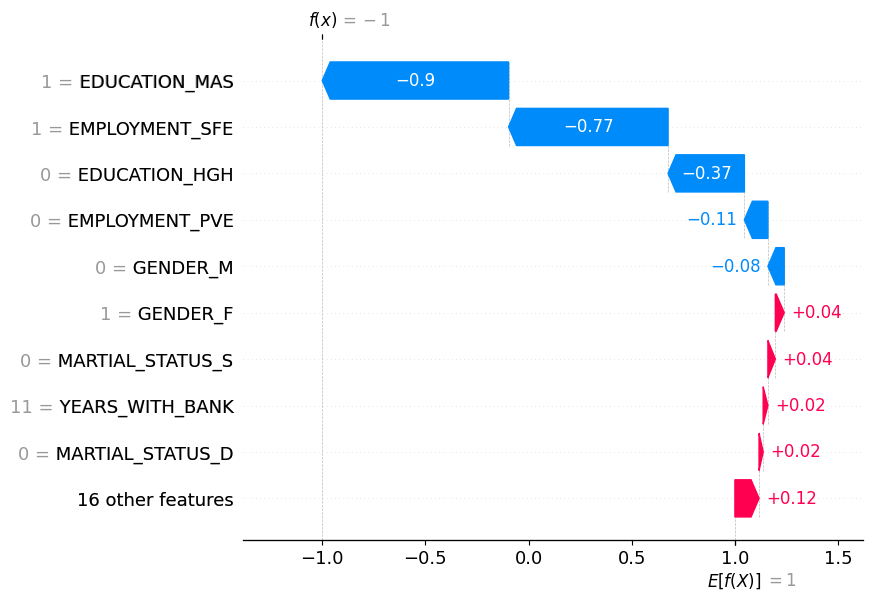

In [82]:
shap.plots.waterfall(shap_values[1556])

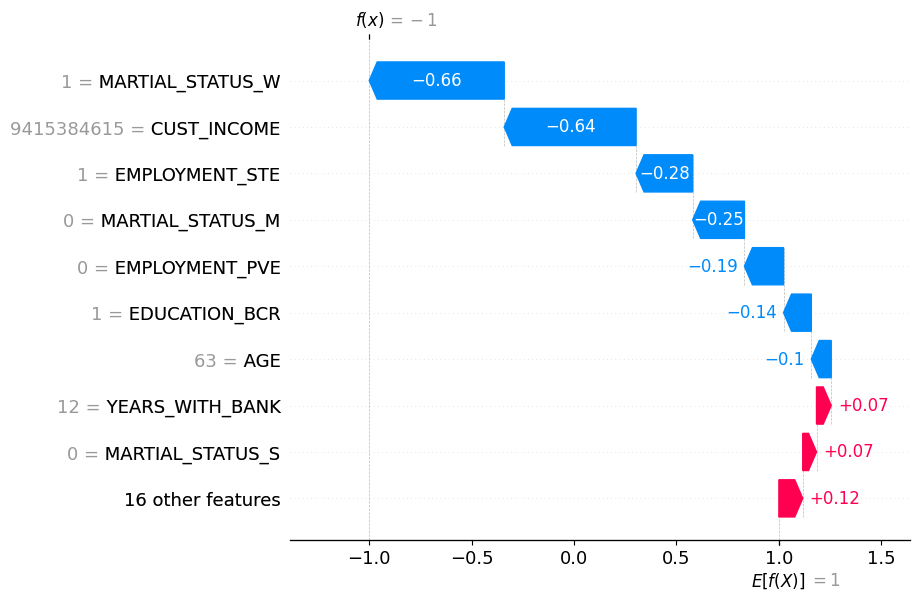

In [80]:
shap.plots.waterfall(shap_values[1979])